# Проект по визуализации данных - данные e-commerce по продаже парфюмов

Источник датасета: https://www.kaggle.com/datasets/kanchana1990/perfume-e-commerce-dataset-2024

Описание колонок:
- brand: бренд парфюма
- title: название парфюма
- type: тип парфюма 
- price: цена парфюма
- priceWithCurrency: цена с указанием валюты
- available: доступное для продажи количество парфюма
- availableText: текстовое описание доступности для продажи (прим.: объединяет текстом предыдущую и последующую колонку с цифровыми значениями)
- sold: количество проданных экземпляров
- lastUpdated: время, в которое произошло последнее обновление
- itemLocation: местонахождение айтема

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
from  sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


/var/folders/sj/mbd30dnj4jb3m8bm6k9mfcnw0000gn/T/ipykernel_51331/2131964118.py:4: DeprecationWarning: Please import `pearsonr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.stats import pearsonr


In [ ]:
dfm = pd.read_csv('ebay_mens_perfume.csv')
dfm['sex'] = 'm'
dfw = pd.read_csv('ebay_womens_perfume.csv')
dfw['sex'] = 'w'

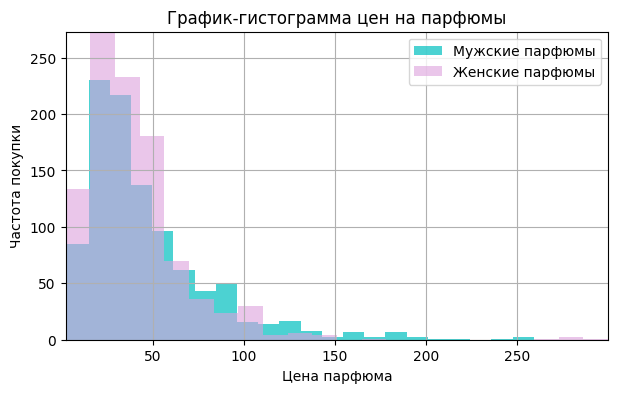

In [ ]:
#1. Распределение цены парфюма для М и Ж
plt.figure(figsize=(7,4))
plt.hist(dfm['price'], bins=22, label="Мужские парфюмы", alpha=0.7, color='c')
plt.hist(dfw['price'], bins=22, label="Женские парфюмы", alpha=0.6, color='#dda0dd')
plt.xlabel('Цена парфюма')
plt.ylabel('Частота покупки')
plt.title('График-гистограмма цен на парфюмы')
plt.legend()
plt.grid(True)
plt.margins(x=0, y=0)
plt.show()

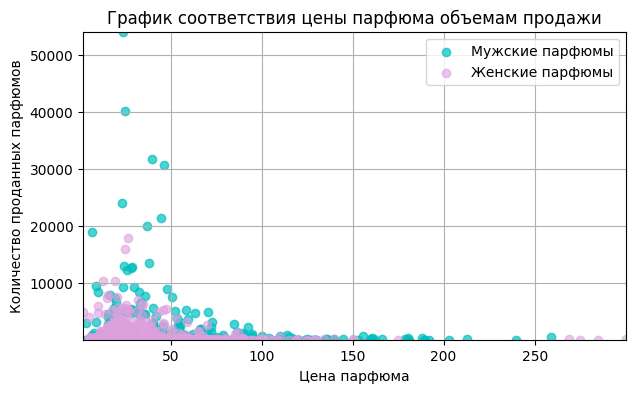

In [ ]:
#2. Влияние цены парфюма на количество проданных экземпляров для мужчин и женщин
plt.figure(figsize=(7,4))
plt.scatter(dfm['price'], dfm['sold'], label="Мужские парфюмы", alpha=0.7, color='c')
plt.scatter(dfw['price'], dfw['sold'], label="Женские парфюмы", alpha=0.6, color='#dda0dd')
plt.xlabel('Цена парфюма')
plt.ylabel('Количество проданных парфюмов')
plt.title('График соответствия цены парфюма объемам продажи')
plt.legend()
plt.grid(True)
plt.margins(x=0, y=0)
plt.show()

Text(65.84722222222221, 0.5, 'Средняя цена проданных пармюфов')

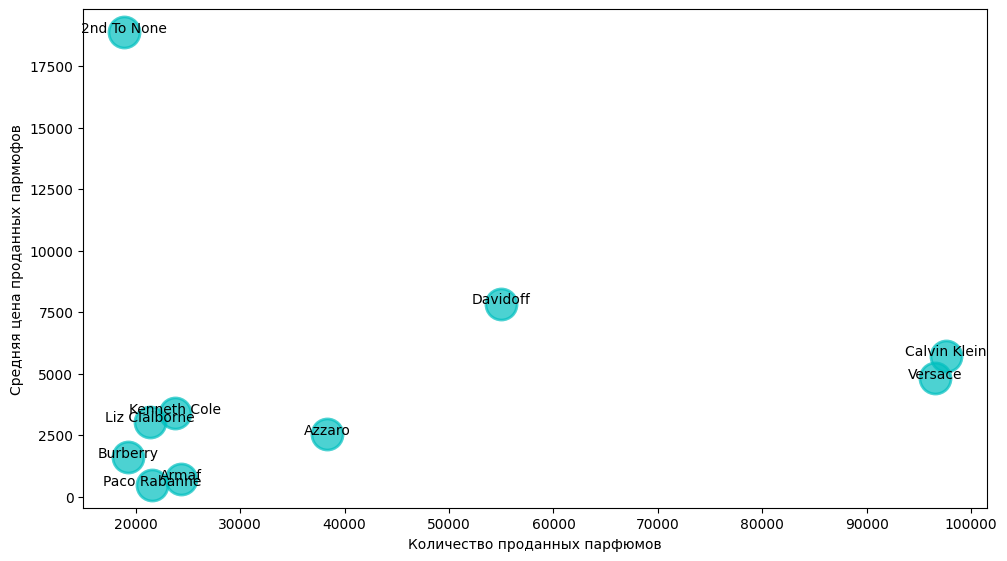

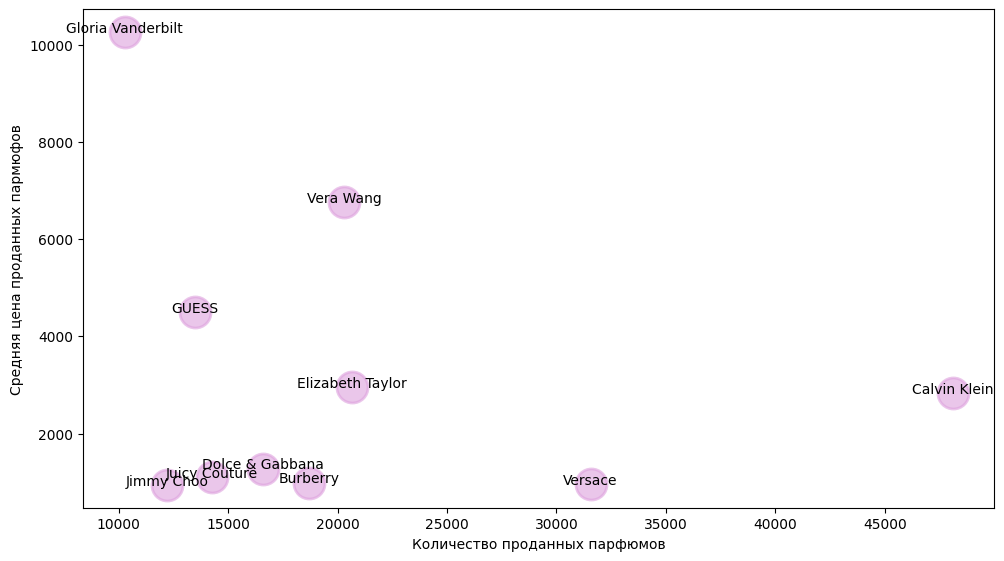

In [ ]:
#3. Выявить топ-10 самых популярных брендов среди мужчин и женщин

men_sales = dfm.groupby('brand')['sold'].sum().reset_index()
men_avg = dfm.groupby('brand')['sold'].mean().reset_index()
women_sales = dfw.groupby('brand')['sold'].sum().reset_index()
women_avg = dfw.groupby('brand')['sold'].mean().reset_index()

men_allinf = pd.merge(men_sales, men_avg, on = 'brand')
men_allinf.columns = ['Brand', 'Total Sales', 'Average Price']
women_allinf = pd.merge(women_sales, women_avg, on = 'brand')
women_allinf.columns = ['Brand', 'Total Sales', 'Average Price']

men_allinf = men_allinf.sort_values('Total Sales', ascending=False)
women_allinf = women_allinf.sort_values('Total Sales', ascending=False)

top_m = men_allinf.head(10)
top_w = women_allinf.head(10)

plt.figure(figsize=(10, 6))
plt.scatter(top_m['Total Sales'], top_m['Average Price'], s=500, color='c', alpha=0.7, linewidth=2)
for i in range(len(top_m)):
    plt.text(top_m['Total Sales'].iloc[i], top_m['Average Price'].iloc[i], top_m['Brand'].iloc[i], fontsize=10, ha='center')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.xlabel('Количество проданных парфюмов')
plt.ylabel('Средняя цена проданных пармюфов')

plt.figure(figsize=(10, 6))
plt.scatter(top_w['Total Sales'], top_w['Average Price'], s=500, color='#dda0dd', alpha=0.6, linewidth=2)
for i in range(len(top_w)):
    plt.text(top_w['Total Sales'].iloc[i], top_w['Average Price'].iloc[i], top_w['Brand'].iloc[i], fontsize=10, ha='center')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.xlabel('Количество проданных парфюмов')
plt.ylabel('Средняя цена проданных пармюфов')

In [ ]:
#4. Корреляция между наличием парфюма и его продажами
df = pd.concat([dfm, dfw], ignore_index=True)
df = df.dropna()

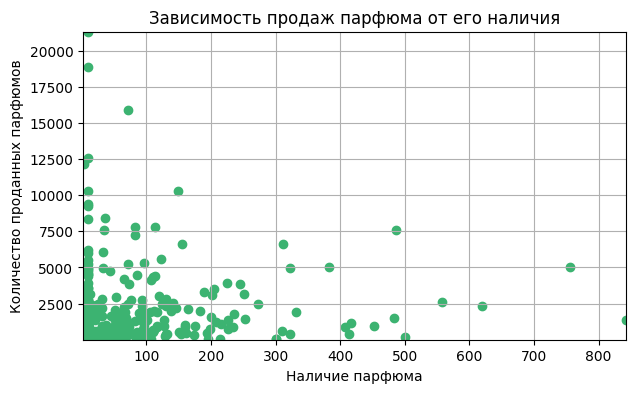

In [ ]:
plt.figure(figsize=(7, 4))
plt.scatter(df['available'], df['sold'], alpha=1, color='mediumseagreen')
plt.xlabel('Наличие парфюма')
plt.ylabel('Количество проданных парфюмов')
plt.title('Зависимость продаж парфюма от его наличия')
plt.grid()
plt.margins(x=0, y=0)

In [ ]:
my_inf = []
my_inf.append(tuple(dfm['price'].to_list()))
my_inf.append(tuple(dfw['price'].to_list()))


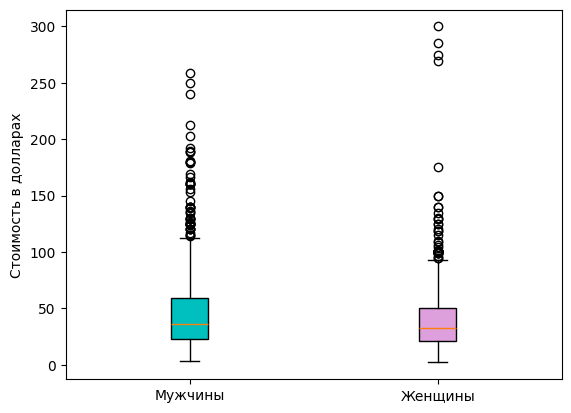

In [ ]:
fig, ax = plt.subplots()
ax.set_ylabel('Стоимость в долларах')

labels = ['Мужчины', 'Женщины']
colors = ['c', '#dda0dd']

bplot = ax.boxplot(my_inf,
                   patch_artist=True,
                   tick_labels=labels)

for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)



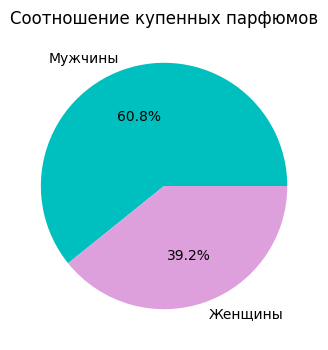

In [ ]:
all_s = []

men_summ = sum(men_sales['sold'])
women_summ = sum(women_sales['sold'])
all_s.append(men_summ)
all_s.append(women_summ)

plt.figure(figsize=(7,4))
plt.pie(all_s, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Соотношение купенных парфюмов')
plt.show()

In [ ]:
X = df.drop('available', axis=1).drop('brand', axis=1).drop('title', axis=1).drop('type', axis=1).drop('priceWithCurrency', axis=1).drop('availableText', axis=1).drop('lastUpdated', axis=1).drop('itemLocation', axis=1).drop('sex', axis=1)
y = df['available']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

regr = LinearRegression()
regr.fit(X_train, y_train)
print(regr.score(X_train, y_train)) 
print(regr.score(X_test, y_test)) 



0.07837859641667866
0.08157897594238173
